In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
url = 'https://raw.githubusercontent.com/COGS118A/Group009-SP23/main/animal-shelter-intakes-and-outcomes.csv'
df = pd.read_csv(url)
df = df.drop(columns=["Animal Type", "Animal ID", "intake_is_dead", "outcome_is_dead"])
#subtract intake date from outtake date to get days in shelter as well as age at intake (days)
df = df.assign(Intake_Date_dt=pd.to_datetime(df['Intake Date']))
df = df.assign(Outcome_Date_dt=pd.to_datetime(df['Outcome Date']))
df = df.assign(DOB_date=pd.to_datetime(df['DOB']))
df['days_in_shelter'] = (df['Outcome_Date_dt'] - df['Intake_Date_dt']).dt.days
df["age_at_intake"] = (df["Outcome_Date_dt"] - df["DOB_date"]).dt.days
#drop date rows, now irrelevant
df = df.drop(columns=["Outcome_Date_dt", "Intake_Date_dt", "DOB", 'Intake Date', 'Outcome Date', "DOB_date" ,"Age", "was_outcome_alive"])
#create list defining "good" outcomes
good_outcomes = ['ADOPTION', 'FOSTER', 'COMMUNITY CAT', 'FOSTER TO ADOPT', 'RESCUE', 'RETURN TO WILD HABITAT', 'HOMEFIRST', 'RETURN TO OWNER', 'SHELTER, NEUTER, RETURN', 'TRAP, NEUTER, RELEASE']
#check if cat faced a good outcome, 1 if it did, 0 if it didn't
df['good_outcome'] = df['Outcome Type'].isin(good_outcomes).astype(int)
#drop outcome related strings (irrelevant)
df = df.drop(columns=["Outcome Type", "Outcome Subtype"])
#drop "crossing" column (data is too difficult to interpret for span of project)
df = df.drop(columns=["Crossing"])
#drop "Animal Name" column (irrelevant for analysis)
df = df.drop(columns=["Animal Name"])
df = df.dropna()

## Exploratory Analysis of the Categorical Variables

The distribution of categories within 'Intake Type', 'Intake Condition', 'Secondary Color', and 'Jurisdiction' is significantly skewed, with one or two categories predominating. The reasons for some of these variables being dominated by one or two categories is predictable. For instance, since the dataset is from the long beach animal shelter, the 'Jurisdiction' of most of animals is Long Beach. However, the remaining categorical variables demonstrate a more balanced distribution, featuring at least five noteworthy categories with substantial presence. You can scroll through to see the catogory counts for the 8 categorical variables.


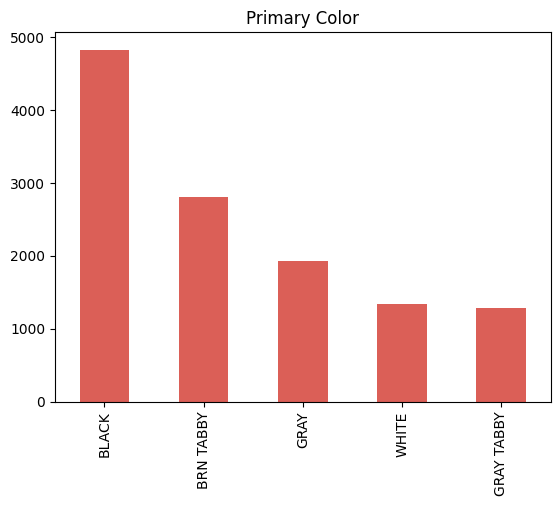

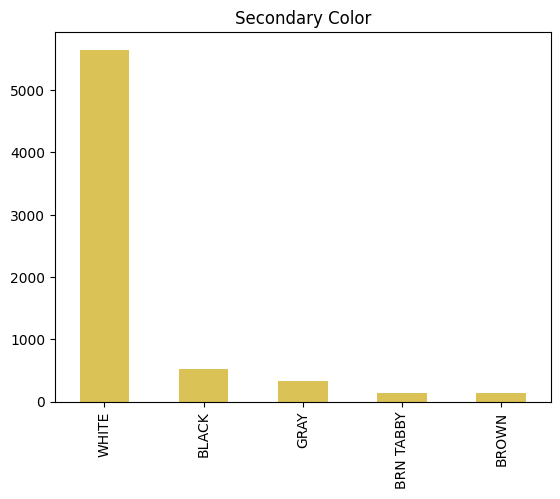

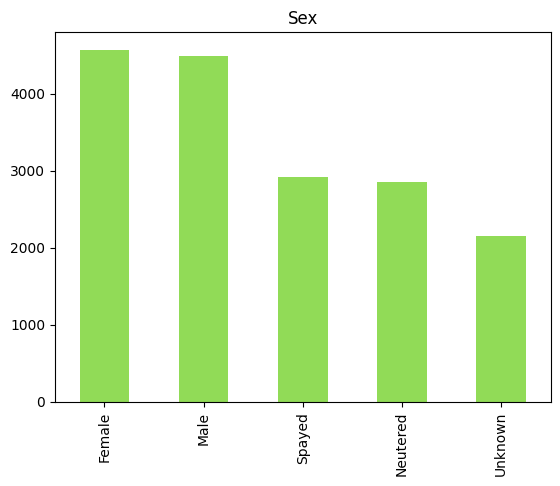

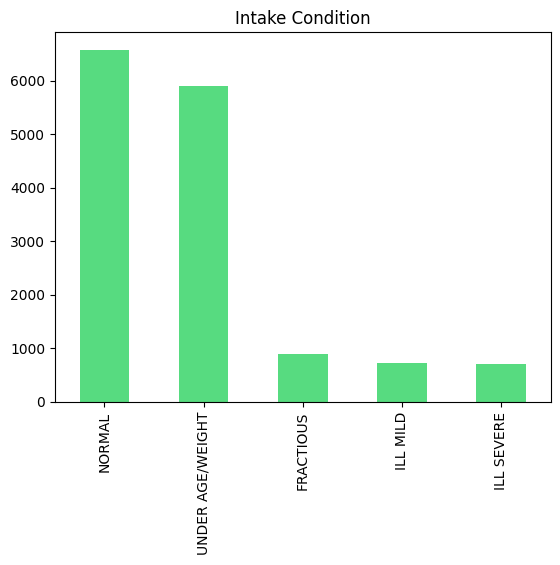

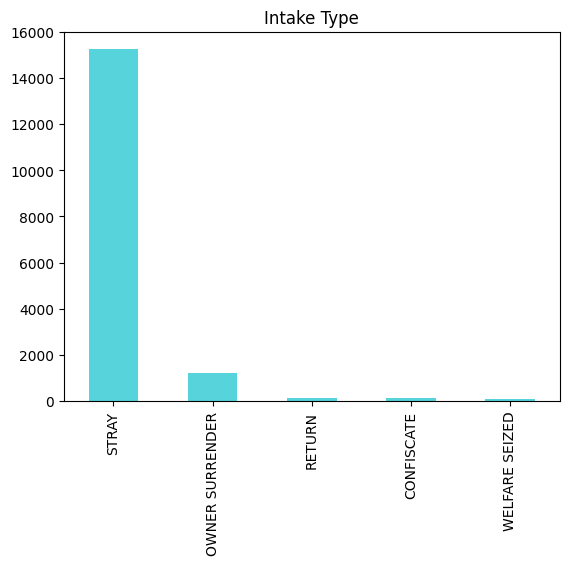

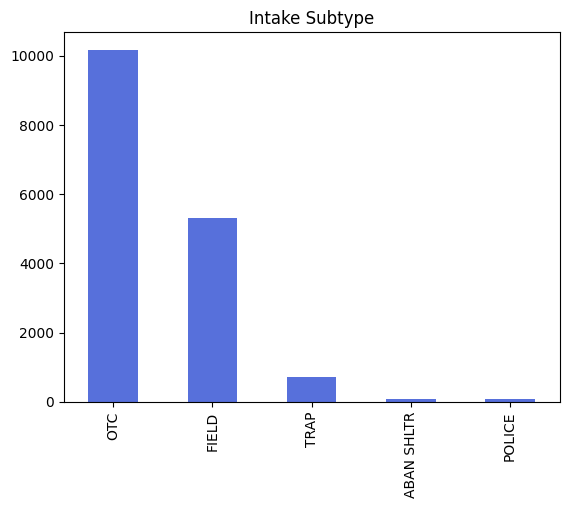

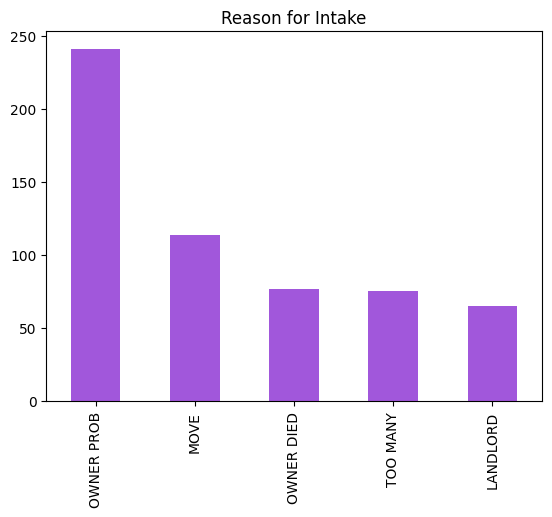

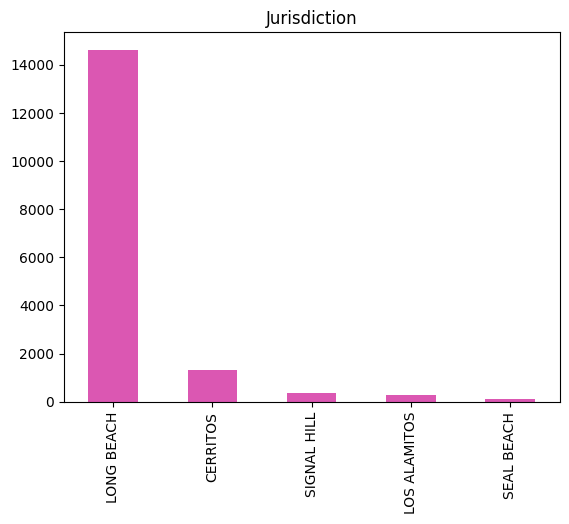

In [16]:
cat_cols = ['Primary Color', 'Secondary Color', "Sex", "Intake Condition", "Intake Type", "Intake Subtype", "Reason for Intake", "Jurisdiction"]
# Create a color palette with as many colors as there are columns
palette = sns.color_palette("hls", len(cat_cols))

for idx, column in enumerate(cat_cols):
    # Use the color corresponding to the current column
    color = palette[idx]

    # Plot the data using this color
    data[column].value_counts().head(5).plot(kind='bar', color=color)

    plt.title(column)
    plt.show()



## Exploratory Analysis of the non-categorical Variables

We can see that our the good_outcomes column is not too directly correalted to any one variable. The correlations are moderate, with the number of days the cat spent in shelter having the most impact on the outcome of the cat.

<ipython-input-14-ffec603f82ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


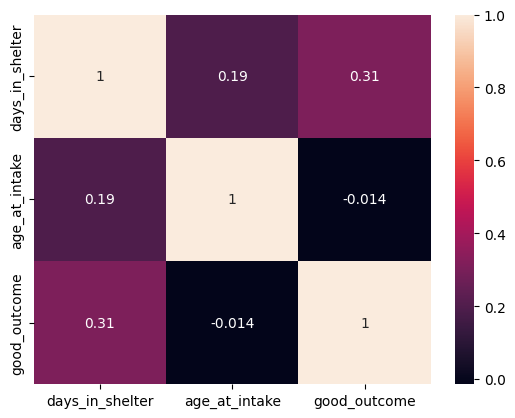

In [14]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()